In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
%matplotlib inline
import missingno as msno
import plotly.graph_objects as go
import dash
from dash import dcc as doc
from dash import html as html
from dash.dependencies import Input, Output

### Dataset loading for visualisation

In [44]:
url="https://covid.ourworldindata.org/data/owid-covid-data.csv"
df_covid_data=pd.read_csv(url, sep=',')
# to convert the dataframe to csv fine 
# df_covid_data.to_csv('../data/raw/covid_full_data_ourworldindata.csv')
print("Total number of countries - ",len(df_covid_data['location'].unique()))
print(df_covid_data['location'].unique())

Total number of countries -  244
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe' 'European Union' 'Faeroe Islands' 'Falkland Islands'
 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gam

In [47]:
country_array = ['Germany', 'Italy', 'United States', 'Spain', 'South Korea']

# Choosing common starting point for all the countries.
#country_array = df_covid_data['location'].unique()
df_dict = {}
least_count = 20000
new_country_list = []

for country in country_array:
    # print(len(df_covid_data[df_covid_data['location']==country]))
    if len(df_covid_data[df_covid_data['location']==country]) > 900:
        new_country_list.append(country)
        df_dict[country] = df_covid_data[df_covid_data['location']==country]
        df_dict[country] = df_dict[country].reset_index(drop=True)
        df_dict[country].loc[:, ('total_cases_per_population')] = df_dict[country].loc[:, ('total_cases')]/df_dict[country].loc[:,('population')]
        df_dict[country].loc[:, ('fully_vaccinated_per_population')] = (df_dict[country].loc[:, ('people_fully_vaccinated')]/df_dict[country].loc[:,('population')])*100
        #df_dict[country].loc[:, ('plot_color')] = clr
        #print(country)
        #print(len(df_dict[country]))
        if least_count > len(df_dict[country]):
            least_count = len(df_dict[country])
        
print("Total number of days data - ",least_count)
print("Final countries for COVID data analysis (having 901 days of data) - ",new_country_list)

#making all dataframes of same length
#for country in country_array:
for country in new_country_list:
    if len(df_dict[country]) > least_count:
        remove_rows = len(df_dict[country]) - least_count
        #print(remove_rows)
        df_dict[country] = df_dict[country][remove_rows:]
    

Total number of days data -  907
Final countries for COVID data analysis (having 901 days of data) -  ['Germany', 'Italy', 'United States', 'Spain', 'South Korea']


In [35]:
df_dict['Germany'].head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,total_cases_per_population,fully_vaccinated_per_population


### Delivery 1

In [ ]:
fig = go.Figure()
for country in new_country_list:
    fig.add_trace(go.Scatter(x=df_dict[country]['date'], y=df_dict[country]['total_cases_per_population'], name=country, mode="lines"))              
#fig.update_yaxes(type="log")
fig.update_layout(width = 1200, height=1000, title="Covid infectors relative cases overtime from April 2020 till now, for Germany, India and Sweden.", xaxis_title="Date", yaxis_title="COVID cases per country's population")
#fig.show()    
# fig.write_image("../reports/figures/delivery1_log_results.jpeg")

### Delivery 2

In [ ]:
fig = go.Figure()
for country in new_country_list:
    fig.add_trace(go.Scatter(x=df_dict[country]['date'], y=df_dict[country]['fully_vaccinated_per_population'].interpolate(method='linear'), name=country, mode="lines"))           

#fig.update_yaxes(type="log")
fig.update_layout(width = 1200, height=1000, title="Vaccination rate over time from April 2020 till now, for Germany, India and Sweden countries.", xaxis_title="Date", yaxis_title="Percentage of fully vaccinated people")
#fig.show()    
# fig.write_image("../reports/figures/delivery2_results.jpeg")

### Delivery 3

In [48]:
# Create dictionary to bind to the drop-down list in Dashboard.
country_litst = new_country_list
#country_litst
c_list = []
for country in country_litst:
    dic = {}
    dic['label'] = country
    dic['value'] = country
    c_list.append(dic)
    
print(c_list)

[{'label': 'Germany', 'value': 'Germany'}, {'label': 'Italy', 'value': 'Italy'}, {'label': 'United States', 'value': 'United States'}, {'label': 'Spain', 'value': 'Spain'}, {'label': 'South Korea', 'value': 'South Korea'}]


In [49]:
def quick_plot(country_list, df_dict, y_scale='log', slider=False):
    """
    TODO
    """
    fig = go.Figure()
    for country in new_country_list:
        fig.add_trace(go.Scatter(x = df_dict[country]['date'], 
                                 y = df_dict[country]['total_cases_per_population'], 
                                 name=country,
                                 opacity=0.9,
                                 line_width= 1,
                                 marker_size = 2,
                                 mode="markers+lines"))       
        #fig.add_trace(go.Scatter(x=final_df['date'], y=final_df[country], name=country, mode="lines"))       

    fig.update_yaxes(type=y_scale)
    fig.update_layout(width = 900,
                      height = 600, 
                      xaxis_rangeslider_visible=slider,
                      title="Covid infectors relative cases overtime from April 2020 till now, for Germany, India and Sweden.", 
                      xaxis_title="Date", 
                      yaxis_title="COVID cases per country's population")

    fig.show()

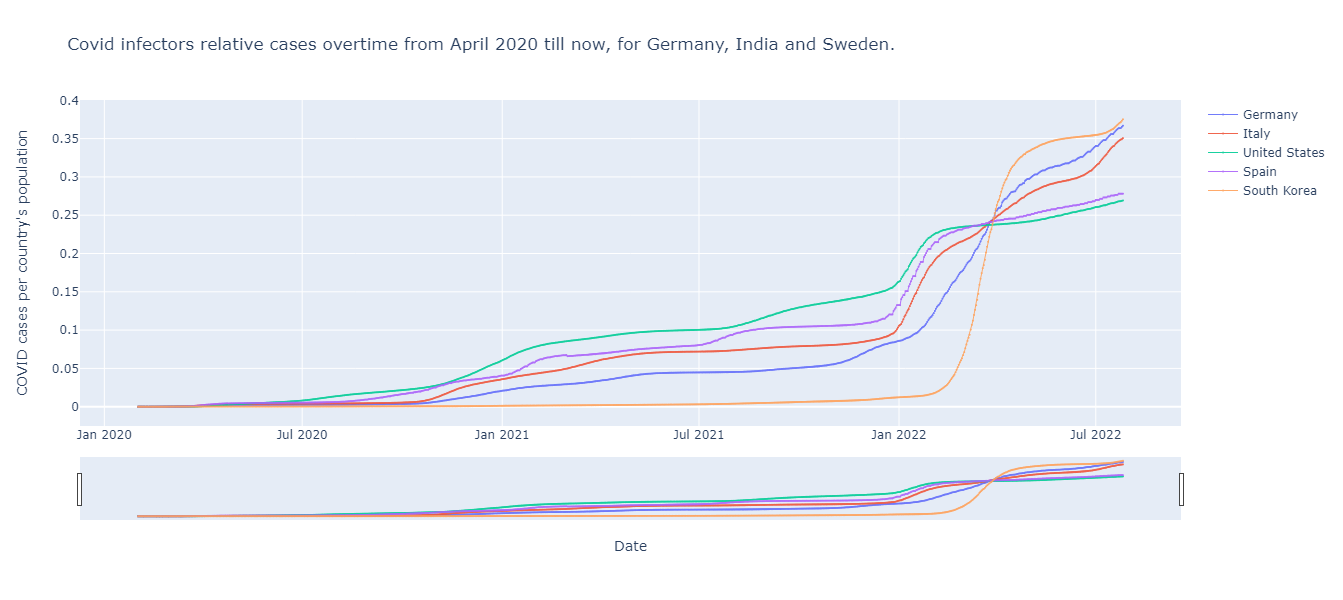

In [50]:
quick_plot(new_country_list, df_dict, 'linear', True)

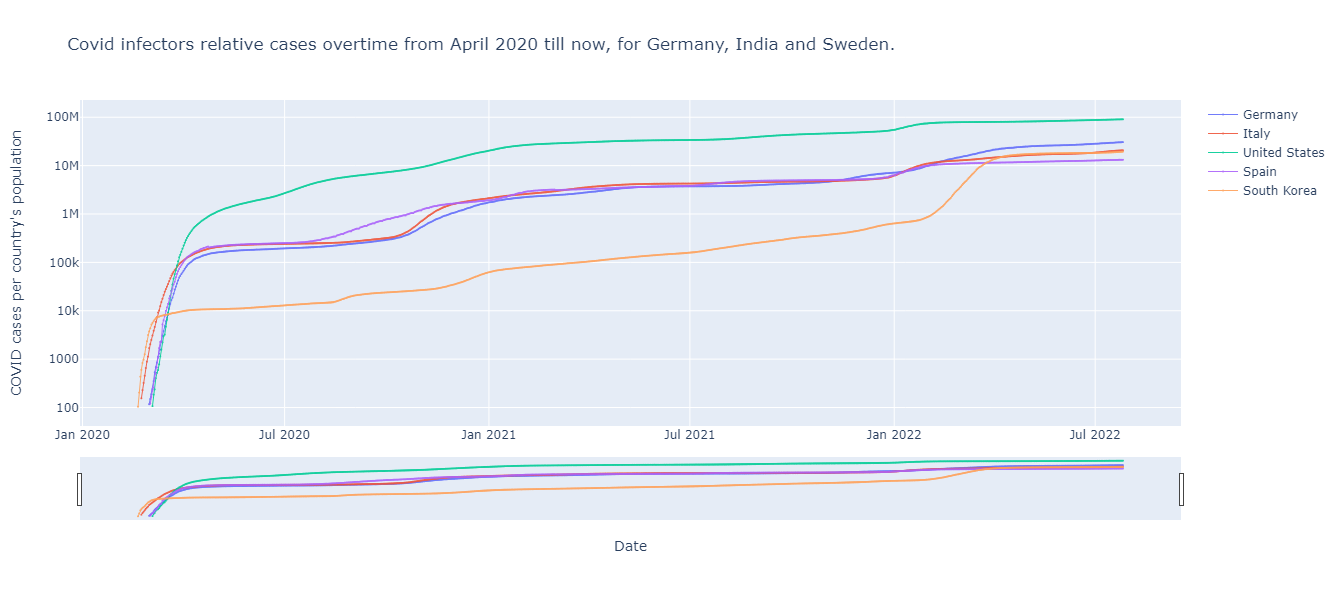

In [51]:
def quick_plot1(country_list, df_dict, y_scale='log', slider=False):
    """
    TODO
    """
    fig = go.Figure()
    for country in new_country_list:
        fig.add_trace(go.Scatter(x = df_dict[country]['date'], 
                                 y = df_dict[country]['total_cases'], 
                                 name=country,
                                 opacity=0.9,
                                 line_width= 1,
                                 marker_size = 2,
                                 mode="markers+lines"))       
        #fig.add_trace(go.Scatter(x=final_df['date'], y=final_df[country], name=country, mode="lines"))       

    fig.update_yaxes(type=y_scale)
    fig.update_layout(width = 900,
                      height = 600, 
                      xaxis_rangeslider_visible=slider,
                      title="Covid infectors relative cases overtime from April 2020 till now, for Germany, India and Sweden.", 
                      xaxis_title="Date", 
                      yaxis_title="COVID cases per country's population")

    fig.show()
threshold = 100
df_threshold_dict = {}

for i, country in enumerate(new_country_list):
    df_threshold_dict[country] = df_dict[country][df_dict[country].loc[:, ('total_cases')]>threshold]

#print(df_threshold_dict['Germany'])
quick_plot1(new_country_list, df_threshold_dict, 'log', True)

In [ ]:
# Create dashboard for COVID data analysis.
fig = go.Figure()
app = dash.Dash()

@app.callback(
    Output('covid_plot', 'figure'),
    [Input('country_multi_select_drop_down', 'value')]
)
def update_figure(country_list):
    traces=[]
    for country in country_list:
        traces.append(dict(
            x = df_dict[country]['date'], 
            y = df_dict[country]['total_cases_per_population'], 
            name=country,
            opacity=0.9,
            line_width= 1,
            marker_size = 2,
            mode="markers+lines"
        ))
    return {
        'data':traces,
        'layout': dict(
            width = 1600,
            height = 1200, 
            xaxis_rangeslider_visible=True,
            title="Covid infectors relative cases overtime from April 2020 till now, for different countries.", 
            xaxis_title="Date", 
            yaxis_title="COVID cases per country's population",
            xaxis={
                'tickangle':-45,
                'nticks':20,
                'tickfont':dict(size=14, color='#7f7f7f')
            },
            yaxis={
                'type':'log',
                'range':'[1.1,5.5]'
            }
        )
    }

app.layout = html.Div([
    html.Label('Multi-Select Country'),
    doc.Dropdown(id='country_multi_select_drop_down', 
                 options=c_list,
                value=['Germany', 'India'],
                multi=True
                ),
    doc.Graph(id='covid_plot', figure=fig)
])
app.run_server(debug=True, use_reloader=False)
# fig.write_image("../reports/figures/delivery1_log_results.jpeg")

In [ ]:
quick_plot(new_country_list, df_dict, 'linear', True)